# ĐỒ ÁN CUỐI KỲ MÔN LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU

*Giảng viên: Thầy Trần Trung Kiên*

---

**Nhóm sinh viên thực hiện:**

Sinh viên 01: Trương Trọng Lộc - 18120197

Sinh viên 02: Dương Nam Hải - 19120068

---

## Import các thư viện cần thiết

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

---

## Thu thập dữ liệu

### Tổng quan về dữ liệu

- Tập dữ liệu được sử dụng trong đồ án là tập dữ liệu về các **nhân tố có thể tác động đến tuổi thọ** con người 
(chẳng hạn về giáo dục, y tế, kinh tế) của 183 quốc gia trên thế giới từ năm 2000-2016. Tập dữ liệu tên là **WHO national life expectancy**.
- Tập dữ liệu được lấy và download từ Kaggle thông qua [đường dẫn](https://www.kaggle.com/mmattson/who-national-life-expectancy), bộ dữ liệu do tác giả MMattson thu thập.

### Dữ liệu được phép sử dụng hay không?

License của tập dữ liệu này là [CC0 - Public Domain](https://creativecommons.org/publicdomain/zero/1.0/). Với license này thì ta có thể sử dụng tập dữ liệu mà không cần xin phép tác giả. Cụ thể, license này thể hiện tác giả đã từ bỏ quyền sở hữu của bản thân để trao quyền cho người khác có thể sử dụng để chỉnh sửa, phân phối,... dưới bất kỳ hình thức nào trong phạm vi pháp luật (có thể là học tập, nghiên cứu, thương mại,...).

### Dữ liệu được thu thập như thế nào?

* Dữ liệu được thu thập từ dữ liệu của Tổ chức Y tế Thế giới (World Health Organization) thông qua cả 3 cách sau: 
    * Trang web dữ liệu Thống kê về Giáo dục các Quốc gia của Viện thống kê UNESCO ([UNESCO Databases of Resources on Education](https://en.unesco.org/themes/education/databases));
    * API từ [GHO (Global Health Observatory)](https://www.who.int/data/gho/);
    * Thủ công.
* Chi tiết về cách thu thập dữ liệu có thể tham khảo tại notebook của tác giả tại [đây](https://www.kaggle.com/mmattson/template-to-generate-the-dataset).

---

## Khám phá dữ liệu

### Đọc dữ liệu từ file CSV vào dataframe

Dữ liệu được lưu trong 1 file CSV duy nhất `who_life_exp.csv` và được chứa trong thư mục Data. Ta sử dụng thư viện Pandas để đọc dữ liệu từ CSV này vào Data Frame.

In [2]:
life_exp_df = pd.read_csv('./Data/who_life_exp.csv')
life_exp_df.head()

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,...,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,...,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN,NaN
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,...,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN,NaN,67.40542,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,...,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN,NaN,NaN,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,...,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN,NaN,NaN,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,...,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN,NaN,NaN,NaN


### Dữ liệu gồm có bao nhiêu dòng và bao nhiêu cột?

In [3]:
num_rows, num_cols = life_exp_df.shape
num_rows, num_cols

(3111, 32)

**Nhận xét:** 
* Tập dữ liệu gồm 3111 dòng và 32 cột.
* Ngoài ra, theo thông tin của bộ dữ liệu, dữ liệu được khảo sát từ năm 2000-2016 ở 183 quốc gia, điều này hoàn toàn phù hợp với kết quả là 3111 dòng (nói cách dễ hiểu là do 2000-2016 là 17 năm, ta lấy 17 năm * 183 quốc gia = 3111 dòng, dự đoán ban đầu của nhóm em là vậy ^^ Nhóm em sẽ khảo sát ở phần sau xem thử có đúng như dự đoán không).

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

* Theo quan sát, mỗi dòng thể hiện thông tin về các yếu tố có thể ảnh hưởng đến tuổi thọ (tỉ lệ tiêm chủng, dân số, tỉ lệ người lớn biết chữ, thu nhập bình quân,...) của **một quốc gia** trong **một năm**. 
* Có vẻ **không** có dòng nào có ý nghĩa khác nhau. 

### Dữ liệu có các dòng bị lặp không?

Kiểm tra việc này và lưu kết quả vào biến `have_duplicated_rows`. Biến này sẽ có giá trị True nếu dữ liệu có các dòng bị lặp và có giá trị False nếu ngược lại.

In [4]:
have_duplicated_rows = life_exp_df.duplicated().sum()
if have_duplicated_rows != 0:
    print("Có dòng dữ liệu bị lặp")
else:
    print("Không có dữ liệu trùng lặp")

Không có dữ liệu trùng lặp


### Mỗi cột có ý nghĩa gì?

Theo mô tả trên Kaggle, mỗi cột có ý nghĩa như sau:

|Tên cột dữ liệu | Mô tả |
|:------:| ---|
|Country| Tên quốc gia khảo sát |
|country_code| Mã định danh quốc gia (3 chữ cái)|
|region| Khu vực của quốc gia khảo sát|
|year| Năm khảo sát|
|life_expect| Tuổi thọ kì vọng khi sinh (đơn vị năm) |
|life_exp60| Tuổi thọ kì vọng còn lại khi 60 tuổi (đơn vị năm)|
|adult_mortality|Tỷ lệ tử vong của người trưởng thành (xác suất tử vong từ 15 đến 60 tuổi trên 1000 dân số)|
|infant_mort|Tỷ lệ tử vong dưới 1 tuổi|
|age1-4mort|Tỷ lệ tử vong từ 1 đến 4 tuổi|
|alcohol|Mức tiêu thụ rượu bình quân đầu người từ 15 tuổi trở lên (tính bằng rượu nguyên chất)|
|bmi|BMI trung bình (từ 18 tuổi trở lên) (ước tính chuẩn hóa theo độ tuổi)|
|age5-19thinness|Tỷ lệ suy dinh dưỡng ở trẻ em và thanh thiếu niên (%)|
|age5-19obesity	|Tỷ lệ béo phì ở trẻ em và thanh thiếu niên (%)|
|hepatitis|Tỷ lệ tiêm ngừa viêm gan siêu vi B (HepB) ở trẻ 1 tuổi (%)|
|measles|Tỷ lệ tiêm ngừa sởi mũi đầu tiên (MCV1) ở trẻ 1 tuổi (%)|
|polio| Tỷ lệ tiêm ngừa bại liệt (Pol3) ở trẻ 1 tuổi (%)|
|diphtheria|Tỷ lệ tiêm ngừa bạch hầu, uốn ván và ho gà (DTP3) cho trẻ 1 tuổi (%)|
|basic_water|Tỷ lệ dân số được tiếp cận các dịch vụ nước cơ bản|
|doctors|Mật độ bác sĩ y khoa trên 10.000 dân|
|hospitals|Mật độ bệnh viện trên 100.000 dân|
|gni_capita|Tổng thu nhập quốc dân trên đầu người, đơn vị $ (tổng thu thập mà người dân và doanh nghiệp của quốc gia kiếm được)|
|gghe-d	|Chi tiêu từ ngân sách chính phủ cho lĩnh vực y tế tính theo tỷ lệ phần trăm của tổng sản phẩm quốc nội (GDP) (%)|
|che_gdp|Chi phí người dân bỏ ra cho dịch vụ y tế (CHE) tính theo phần trăm tổng sản phẩm quốc nội (GDP) (%)|
|une_pop|Dân số (đơn vị nghìn)|
|une_infant|Tỷ lệ tử vong ở trẻ sơ sinh trên 1.000 ca sinh sống|
|une_life|Tuổi thọ kì vọng nếu các hình thức tử vong phổ biến tại thời điểm được sinh ra không thay đổi trong suốt cuộc đời của trẻ|
|une_hiv|Tỷ lệ nhiễm HIV, đơn vị \% trên tổng dân số từ 15-49 tuổi|
|une_gni|Thu nhập quốc dân trên đầu người|
|une_poverty|Tỷ lệ số người nghèo có mức sống 1,90 đô la một ngày (PPP) (\% trên dân số)|
|une_edu_spend|Chi tiêu của chính phủ cho giáo dục tính theo phần trăm GDP (\%)|
|une_literacy|Tỷ lệ người lớn biết chữ, cả hai giới (dân số trên 15 tuổi) (\%)|
|une_school|Số năm đi học trung bình (ISCED 1 trở lên), cả hai giới (dân số trên 25 tuổi)|

**Các thuộc tính có tên `une_`** được thống kê bởi tổ chức UNESCO.

**Các thuộc tính còn lại** được thống kê bởi GHO (Global Health Observatory).


### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [5]:
col_dtypes = life_exp_df.dtypes
col_dtypes

country             object
country_code        object
region              object
year                 int64
life_expect        float64
life_exp60         float64
adult_mortality    float64
infant_mort        float64
age1-4mort         float64
alcohol            float64
bmi                float64
age5-19thinness    float64
age5-19obesity     float64
hepatitis          float64
measles            float64
polio              float64
diphtheria         float64
basic_water        float64
doctors            float64
hospitals          float64
gni_capita         float64
gghe-d             float64
che_gdp            float64
une_pop            float64
une_infant         float64
une_life           float64
une_hiv            float64
une_gni            float64
une_poverty        float64
une_edu_spend      float64
une_literacy       float64
une_school         float64
dtype: object

**Nhận xét:** Các cột có kiểu dữ liệu không phải `object` phù hợp, cần làm rõ hơn 3 cột có kiểu dữ liệu đang là `object`, trong Python kiểu dữ liệu `object` thường chỉ chuỗi, nhưng thật chất nó có thể chứa đối tượng bất kỳ vì bên dưới lưu dưới dạng địa chỉ. Trong Data Frame, nếu một cột có `dtype` là `object` thì có thể các phần tử trong cột này sẽ có kiểu dữ liệu khác nhau. Do đó, cần khảo sát từng cột có `dtype` là `object`.

In [6]:
# Hàm trả về các kiểu dữ liệu trong 1 cột
def open_object_dtype(s):
    dtypes = set()
    
    dtypes = set(s.apply(type))
    
    return dtypes

In [7]:
print(open_object_dtype(life_exp_df['country']))
print(open_object_dtype(life_exp_df['country_code']))
print(open_object_dtype(life_exp_df['region']))

{<class 'str'>}
{<class 'str'>}
{<class 'str'>}


Như vậy, cả 3 cột đều có 1 kiểu dữ liệu duy nhất là `str`. 
Do đó **tất cả các cột** trong tập dữ liệu đều đang có kiểu dữ liệu **phù hợp**.

### Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?

* Trong 32 cột dữ liệu của dataset, theo khám phá ở trên có 3 cột là `country`, `country_code` và `region` dạng `object` (cụ thể hơn là `str`). Do đó, ta có tổng cộng 29 cột có kiểu dữ liệu dạng numeric (bài này là `in64` và `float64`). 
* Với mỗi cột numeric, tính tỉ lệ % giá trị thiếu (từ 0 đến 100), min, max. Kết quả được vào Data Frame `nume_col_df`. Dataframe này có 9 dòng là "missing_ratio", "count", "mean", "std", "min", "25%", "50%", "75%", "max"; và có 29 cột tương ứng với các cột có `dtype` là `int64` hoặc `float64`.  

In [8]:
def missing_ratio(s):
    return s.isna().mean() * 100
missing_df = life_exp_df.iloc[:,3:].agg([missing_ratio])
nume_col_df = pd.concat([missing_df, life_exp_df.iloc[:,3:].describe()])
nume_col_df

,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,...,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
missing_ratio,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.607200,1.092896,1.092896,1.092896,...,3.760849,1.189328e+00,0.000000,0.000000,23.818708,3.760849,70.652523,41.337191,81.645773,74.124076
count,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3061.000000,3077.000000,3077.000000,3077.000000,...,2994.000000,3.074000e+03,3111.000000,3111.000000,2370.000000,2994.000000,913.000000,1825.000000,571.000000,805.000000
mean,2008.000000,69.146384,18.912060,193.527786,0.032496,0.003489,4.834781,25.052714,5.312447,5.972278,...,6.110353,3.707550e+04,30.488428,68.957352,2.038397,14964.832999,10.845893,4.532930,81.984472,9.712214
std,4.899767,9.129761,2.885412,114.007447,0.030361,0.005146,3.998741,2.193445,4.652408,4.530812,...,2.505267,1.378377e+05,27.756930,9.359194,4.593804,17495.137508,17.168798,1.754280,19.665588,2.854723
min,2000.000000,36.227360,10.728000,49.201850,0.001470,0.000065,0.000000,19.800000,0.100000,0.100000,...,1.025160,7.601600e+01,1.600000,39.441000,0.100000,420.000000,0.100000,0.787440,14.376040,0.559340
25%,2004.000000,63.200095,16.619485,108.269750,0.008255,0.000355,1.198030,23.300000,1.800000,2.000000,...,4.238798,2.195105e+03,8.000000,62.844500,0.100000,2970.000000,0.600000,3.262830,72.701130,7.735940
50%,2008.000000,71.597200,18.508260,164.822200,0.019995,0.000895,3.993560,25.500000,3.800000,5.200000,...,5.758030,8.544297e+03,19.500000,71.409000,0.400000,8340.000000,3.100000,4.425410,90.953740,10.270400
75%,2012.000000,75.537030,21.099175,250.832300,0.051720,0.004877,7.723420,26.500000,7.800000,8.900000,...,7.850327,2.509552e+04,48.050000,75.570645,1.500000,20482.500000,12.400000,5.494980,95.786975,12.070610
max,2016.000000,84.166160,26.394020,696.874200,0.164515,0.039095,20.182460,32.200000,28.100000,26.700000,...,20.413410,1.414049e+06,142.400000,83.984880,28.200000,122670.000000,94.100000,14.059080,99.998190,14.378800


**Nhận xét:** Sau khi khám phá sự phân bố của các cột dữ liệu, ta nhận thấy có 4 cột numeric với missing ratio trên 50% là "hospitals", "une_poverty", "une_literacy", "une_school". Việc dùng các cột nào trong phân tích dữ liệu có thể cho ra kết quả không tốt, vì vậy ta cần loại bỏ chúng trong bước tiền xử lý.

### Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào?

* Theo khám phá ở trên có 3 cột là `country`, `country_code` và `region` dạng `object` (cụ thể hơn là `str`). Do đó, kiểu dữ liệu dạng categorical của tập dữ liệu này gồm 3 cột đẫ nêu. 
* Với mỗi cột dạng categorical, tính tỉ lệ % giá trị thiếu (từ 0 đến 100), số lượng giá trị khác nhau (không xét giá trị thiếu), list/array các giá trị khác nhau (không xét giá trị thiếu). Kết quả được lưu vào Data Frame `cate_col_df`. Dataframe này có 3 dòng là "missing_ratio", "num_diff_vals", "diff_vals"; và có 3 cột là 'country', 'country_code', 'region'. 

In [9]:
def unique_not_miss(s):
    return s.dropna().unique()
cate_col_df = life_exp_df.iloc[:,:3] \
                            .agg([missing_ratio, pd.Series.nunique, unique_not_miss])

cate_col_df.index = ['missing_ratio','num_diff_vals','diff_vals']
cate_col_df

,country,country_code,region
missing_ratio,0.0,0.0,0.0
num_diff_vals,183,183,6
diff_vals,"[Angola, Burundi, Benin, Burkina Faso, Botswan...","[AGO, BDI, BEN, BFA, BWA, CAF, TZA, UGA, ZAF, ...","[Africa, Americas, Eastern Mediterranean, Euro..."


**Nhận xét:** Cả 3 cột dạng categorical đều không có giá trị thiếu. Hai cột `country` và `country_code` có 183 giá trị khác nhau, riêng cột `region` có 6 giá trị khác nhau. Điều này hoàn toàn phù hợp vì có 183 được khảo sát trong tập dữ liệu này, các quốc gia khác nhau có thể thuộc chung 1 khu vực.

### Có các cột dữ liệu nào có ý nghĩa tương đương nhau không? ###

Do dữ liệu có đến 32 cột, và được tác giả thu thập từ nhiều nguồn khác nhau nên sẽ có khả năng có những cột thể hiện một yếu tố giống nhau. Thật vậy, sau khi xem xét kĩ description của các cột dữ liệu, ta nhận thấy có 3 cặp cột sau đây cùng thể hiện các ý nghĩa tương đương nhau:
- Cột `infant_mort` và `une_infant` đều thể hiện tỉ lệ tử vong ở trẻ sơ sinh của quốc gia khảo sát.
- Cột `life_expect` và `une_life` đều thể hiện tuổi thọ kì vọng của quốc gia khảo sát.
- Cột `gni_capita` và `uni_gni` đều thể hiện mức thu nhập bình quân đầu người của quốc gia khảo sát.

Ta tiến hành xem lại phân bố dữ liệu của các cột này:

In [10]:
same_cols_df = life_exp_df[['infant_mort', 'une_infant', 
                            'life_expect', 'une_life', 
                            'gni_capita', 'une_gni']]
pd.concat([same_cols_df.agg([missing_ratio]), same_cols_df.describe()])

,infant_mort,une_infant,life_expect,une_life,gni_capita,une_gni
missing_ratio,0.000000,0.000000,0.000000,0.000000,21.922212,3.760849
count,3111.000000,3111.000000,3111.000000,3111.000000,2429.000000,2994.000000
mean,0.032496,30.488428,69.146384,68.957352,13397.146974,14964.832999
std,0.030361,27.756930,9.129761,9.359194,16258.593973,17495.137508
min,0.001470,1.600000,36.227360,39.441000,250.000000,420.000000
25%,0.008255,8.000000,63.200095,62.844500,2540.000000,2970.000000
50%,0.019995,19.500000,71.597200,71.409000,7460.000000,8340.000000
75%,0.051720,48.050000,75.537030,75.570645,18250.000000,20482.500000
max,0.164515,142.400000,84.166160,83.984880,123860.000000,122670.000000


Ta thấy các cột tương đương có sự phân bố dữ liệu dữ liệu tương đương nhau, vì vậy ta chỉ cần chọn giữ 1 trong mỗi cặp cho quá trình phân tích và bỏ cặp còn lại. Nhưng làm thế nào để chọn ra được cột dữ liệu nào được giữ? Quan sát kĩ thêm thì ta nhận thấy được vài điều sau đây:
- Ngoại trừ các cặp có cùng đơn vị tính thì cặp `infant_mort` và `une_infant` có đơn vị tính khác nhau. Sau khi đọc kĩ lại document từ trang web nguồn của tập dữ liệu, thì cột `infant_mort` được tính là tỉ lệ trên tổng số dân, còn `une_infant` được tính trên mỗi 1000 dân, và giống các cột còn lại. Vì vậy thực chất 2 cột này tuy khác đơn vị tính nhưng vẫn giữ được sự tương đồng.
- Với cặp `gni_capita` và `une_gni`, ta thấy missing_ratio ở `gni_capita` cao rõ rệt và sẽ cho kết quả không tốt trong quá trình phân tích dữ liệu. 

Để đảm bảo sự đồng nhất của các cột, ta lựa chọn thống nhất đơn vị tính trên 1000 dân ở các cột dữ liệu. Thêm vào đó cột `gni_capita` không nên giữ vì missing_ratio cao. Có vẻ như giữ lại 3 cột dữ liệu từ phía Unesco sẽ là lựa chọn hợp lý hơn, vì vậy ở bước tiền xử lý ta sẽ cho drop 3 cột còn lại.

## Tiền xử lý ##

Các công việc:
- Loại bỏ các cột có giá trị thiếu trên 50%
- Loại bỏ 3 cột `infant_mort`, `life_expect`, `gni_capita`

### Loại bỏ các cột có giá trị thiếu trên 50% ###

Ta sẽ thực hiện drop các cột với tỉ lệ thiếu hụt thông tin lớn hơn 50% để tránh kết quả không tốt khi phân tích dữ liệu.

In [11]:
missing_df = life_exp_df.agg(missing_ratio)
cols_to_drop = missing_df[missing_df > 50]
cols_to_drop

hospitals       95.821279
une_poverty     70.652523
une_literacy    81.645773
une_school      74.124076
dtype: float64

In [12]:
life_exp_df = life_exp_df.drop(cols_to_drop.index, axis = 1)
life_exp_df.shape

(3111, 28)

### Loại bỏ 3 cột 'infant_mort', 'life_expect', 'gni_capita' ###

In [13]:
life_exp_df = life_exp_df.drop(['infant_mort', 
                                        'life_expect', 
                                        'gni_capita'], axis=1)
life_exp_df.shape

(3111, 25)

## Quay trở lại bước khám phá dữ liệu ##

Sau khi tiền xử lý bước đầu, ta sẽ có thể khám phá một cách chính xác hơn trên tập dữ liệu đã có để đúc kết nhiều thông tin hơn.

### Có hiện tượng bất thường giữa quan hệ của các cột không? ###

Ta tiến hành phân tích 4 cột `country`, `country_code`, `region` và `year` để xem có các cột có thông tin sai lệch hoặc bị overlap (Ví dụ như thiếu mất 1 năm khảo sát hay quốc gia này lại thuộc 2 châu lục, có 2 country_code khác nhau).

Cách đơn giản là group từng cột còn lại theo cột country, vì dữ liệu khảo sát từ 2000 đến 2016 nên ứng với mỗi country sẽ có 17 dòng dữ liệu. nếu xuất hiện country khác 17 dòng dữ liệu thì ta phát hiện ra sai sót.

In [17]:
country_df = life_exp_df.groupby('country')['country_code'].size()
if country_df[country_df != 17].nunique() == 0:
    print("Không có quốc gia nào sai sót mã country_code")

Không có quốc gia nào sai sót mã country_code


In [19]:
region_df = life_exp_df.groupby('country')['region'].size()
if region_df[region_df != 17].nunique() == 0:
    print("Không có quốc gia nào sai sót region")

Không có quốc gia nào sai sót region


In [26]:
year_df = life_exp_df.groupby('country')['year'].size()
if year_df[year_df != 17].nunique() == 0:
    print("Không có quốc gia nào sai sót year")

Không có quốc gia nào sai sót year


### Khảo sát tỉ lệ tử vong trên toàn thế giới qua các năm ###

Để có thể lấy được tỉ lệ tử vong, ta cần tính tổng 3 cột thể hiện tỉ lệ tử vong vốn có là `une_infant` (Tỉ lệ tử vong trẻ sơ sinh), `age1-4mort` (Tỉ lệ tử vong từ 1-4 tuổi) và `adult_mortality` (Tỉ lệ tử vong ở người trưởng thành).

Tuy nhiên để làm được việc này ta cũng cần biến đổi cột `age1-4mort` từ đơn vị tỉ lệ trên tổng số dân thành trên 1000 người giống 2 cột còn lại. Ta sẽ nhân cột `age1-4mort` cho 1000.

In [30]:
mort_df = life_exp_df[['region', 
                           'year',
                           'country']]
mort_df['mort_rate'] = life_exp_df['une_infant'] \
                        + life_exp_df['age1-4mort'] * 1000 \
                        + life_exp_df['adult_mortality']
mort_df.head()

/tmp/ipykernel_16529/806822123.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mort_df['mort_rate'] = life_exp_df['une_infant'] \


,region,year,country,mort_rate
0,Africa,2000,Angola,531.4533
1,Africa,2001,Angola,515.7876
2,Africa,2002,Angola,492.8747
3,Africa,2003,Angola,475.9419
4,Africa,2004,Angola,460.6161


Do có đến 183 country, ta sẽ scatter plot dựa trên tên region để thuận tiện hơn cho việc quan sát dữ liệu.

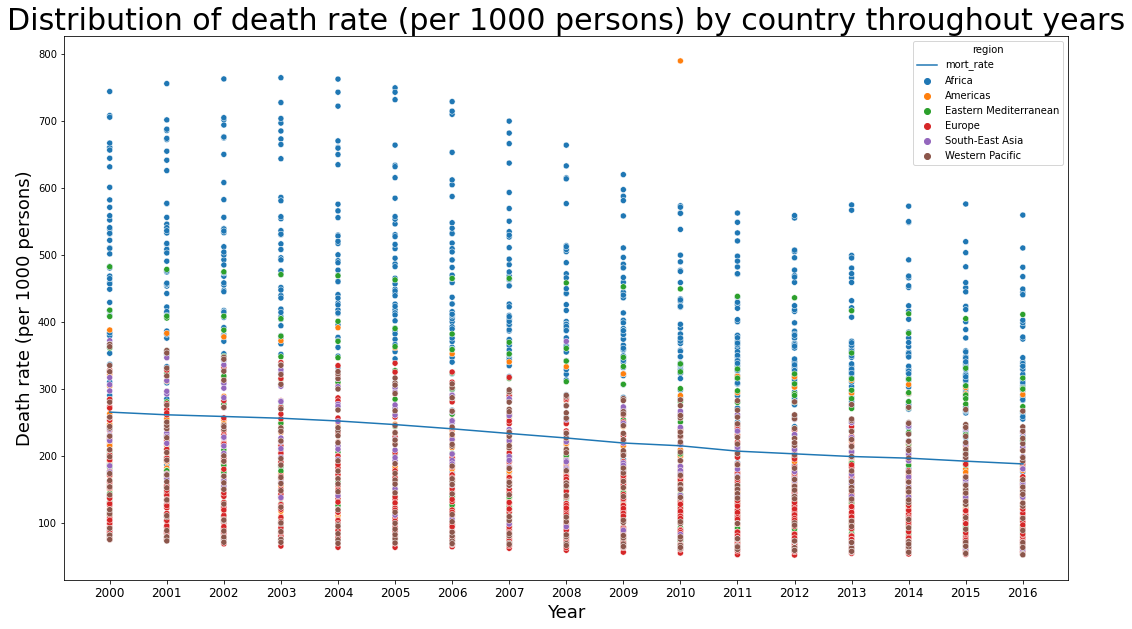

In [31]:
import seaborn as sns

plt.figure(figsize=(18,10))
mean_mort = mort_df.groupby('year')['mort_rate'].mean()
mean_mort.plot.line()


sns.scatterplot(x=mort_df['year'],
                y=mort_df['mort_rate'],
                hue=mort_df['region']);
plt.xticks(range(mort_df['year'].min(), 
                 mort_df['year'].max() + 1), 
            size=12)
plt.xlabel('Year', size=18)
plt.ylabel('Death rate (per 1000 persons)', size=18)
plt.title('Distribution of death rate (per 1000 persons) by country throughout years',
          size=30);

Nhận xét:
- Nhìn chung các nước Châu Phi và Đông Địa Trung Hải có tỉ lệ tử vong cao hơn hẳn phần còn lại của thế giới trong giai đoạn thực hiện khảo sát. Điều này một phần phản ánh được chất lượng cuộc sống ở các quốc gia này kém hơn hẳn các quốc gia Châu Mỹ hay Châu Âu.
- Tuy nhiên vào năm 2010, ta nhận thấy 1 điểm dữ liệu cao khác thường thể hiện một quốc gia Châu Mỹ có tỉ lệ tỉ vong tăng đột biến. Ta sẽ tiến hành khám phá outlier này.

In [32]:
ame_2010_df = mort_df[(mort_df['region'] == 'Americas') 
                          & (mort_df['year'] == 2010)]
idx_max = ame_2010_df['mort_rate'].idxmax()
max_mort_country = ame_2010_df.loc[idx_max]['country']
mort_df[mort_df['country'] == max_mort_country]

,region,year,country,mort_rate
1156,Americas,2000,Haiti,388.0838
1157,Americas,2001,Haiti,383.1980
1158,Americas,2002,Haiti,377.7411
1159,Americas,2003,Haiti,372.1137
1160,Americas,2004,Haiti,391.5365
1161,Americas,2005,Haiti,361.4985
1162,Americas,2006,Haiti,352.5454
1163,Americas,2007,Haiti,340.4888
1164,Americas,2008,Haiti,333.3753
1165,Americas,2009,Haiti,322.6790


Vậy quốc gia gây ra outlier chính là Haiti, với tỉ lệ tử vong năm 2010 vào xấp xỉ 789/1000 người, tăng khoảng gấp đôi so với các năm còn lại. Khám phá thêm về Haiti năm 2010 ta tìm được thông tin sau đây:

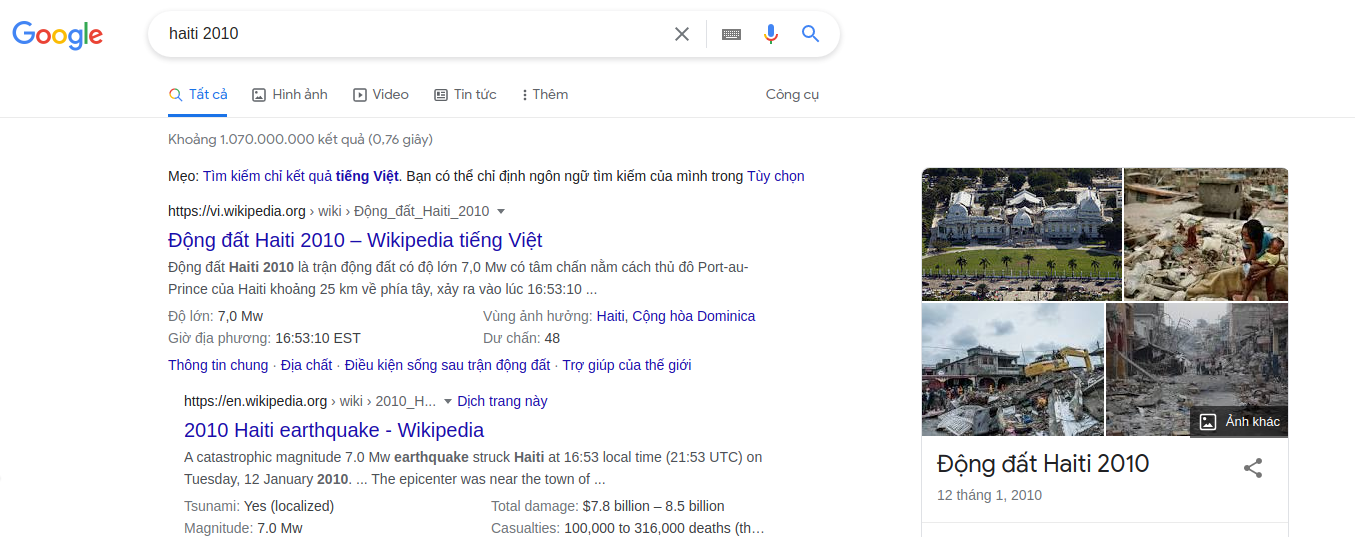

Năm 2010 ở Haiti xảy ra trận động đất gây thương vong vào khoản 200.000 người (theo [wikipedia](https://vi.wikipedia.org/wiki/%C4%90%E1%BB%99ng_%C4%91%E1%BA%A5t_Haiti_2010)). Đó là nguyên nhân gây ra outlier trong tập dữ liệu.

Việc sử dụng outlier này trong phân tích dữ liệu có thể gây mất chính xác, vị vậy ta tiến hành loại bỏ outlier này khỏi tập dữ liệu.

In [ ]:
life_exp_df.drop(life_exp_df[(life_exp_df['country'] == 'Haiti') 
                             & (life_exp_df['year'] == 2010)].index, 
                 inplace=True)
life_exp_df.shape

### So sánh tuổi thọ kì vọng giữa các khu vực trong năm 2000 và 2016 ###

<AxesSubplot:xlabel='year'>

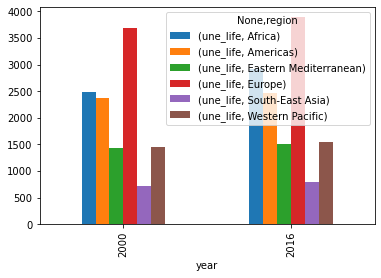

In [144]:
life_region_df = life_exp_df[['year', 'region', 'une_life']]
life_region_df = life_region_df[(life_region_df['year']==2000)
                                   | (life_region_df['year']==2016)].groupby(['region', 
                                          'year']).sum()

life_region_df.unstack(0).plot.bar()

In [136]:
df = pd.DataFrame([['A', 10, 20, 10, 30], ['B', 20, 25, 15, 25], ['C', 12, 15, 19, 6],
                   ['D', 10, 29, 13, 19]],
                  columns=['Team', 'Round 1', 'Round 2', 'Round 3', 'Round 4'])
df

,Team,Round 1,Round 2,Round 3,Round 4
0,A,10,20,10,30
1,B,20,25,15,25
2,C,12,15,19,6
3,D,10,29,13,19


<AxesSubplot:>

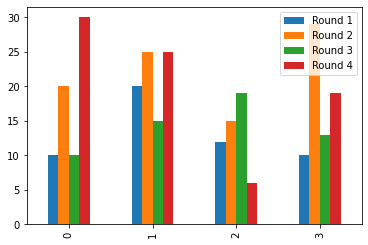

In [135]:
df.plot.bar()

---

## Đưa ra câu hỏi cần trả lời

### Tiền xử lý

### Phân tích dữ liệu để trả lời cho các câu hỏi 

---

## Nhìn lại quá trình làm đồ án

---

## Tài liệu tham khảo

---